# Deutsch-Jozsa Algorithm
in simple words is the generalized version of Deutsch's Algorithm

## The Problem
The input function takes the form $f:\Sigma^n \to \Sigma$ for arbitrary positive integer $n$.<br>
The function is considered balanced if the number of input strings on which the function returns the value 0 is equal to the number of input strings on which the function returns the value 1.<br>
Example:<br>
$f(x_1,x_2,x_3) = x_1 \oplus x_2 \oplus x_3$ is a balanced function.<br>
$f(x_1,x_2,x_3) = x_1 \wedge x_2 \wedge x_3$ is not a balanced function.

The task of the problem is to return 0 when the function is constant and 1 when its balanced.
There will be functions that does not fall into either category, but we do not worry about them for this problem.

## The Quantum Oracle
Define an operator 
\begin{equation*}
U_f:\lvert \Psi \rangle \lvert a \rangle \mapsto (X^{f(a)} \lvert \Psi \rangle) \lvert a \rangle
\end{equation*}

## Mathematical Explanation of the algorithm
Let $H$ be the Hadamard Operator.<br>
\begin{equation*}
H\lvert 0 \rangle = \frac{1}{\sqrt 2}\lvert 0 \rangle + \frac{1}{\sqrt 2}\lvert 1 \rangle
\end{equation*}

\begin{equation*}
H\lvert 1 \rangle = \frac{1}{\sqrt 2}\lvert 0 \rangle - \frac{1}{\sqrt 2}\lvert 1 \rangle
\end{equation*}

We can combine the equations into:<br>
\begin{equation*}
H\lvert a \rangle = \frac{1}{\sqrt 2}\lvert 0 \rangle + \frac{1}{\sqrt 2}(-1)^a\lvert 1 \rangle = \frac{1}{\sqrt 2}\sum_{b\in \{0,1\}}(-1)^{ab}\lvert b \rangle
\end{equation*}

for $a \in \Sigma$

Now suppose we have $n$ qubits, and the Hadamard gate is performed on each. The combined operation on the $n$ qubits are described by the tensor product $H \otimes \cdots \otimes H$ ($n$ times). We could also write it as $H^{\otimes n}$ for conciseness.<br>
With that, we can express the combined operation on the standard basis states of $n$ qubits as:<br>


\begin{align*}
H^{\otimes n}\lvert x_{n-1} \cdots x_1 x_0\rangle &= (H\lvert x_{n-1}\rangle ) \otimes \cdots \otimes (H\lvert x_0 \rangle) \\
&= (\frac{1}{\sqrt 2}\sum_{y_{n-1}\in \Sigma }(-1)^{x_{n-1}y_{n-1}}\lvert y_{n-1} \rangle) \otimes \cdots \otimes (\frac{1}{\sqrt 2}\sum_{y_{0}\in \Sigma }(-1)^{x_{0}y_{0}}\lvert y_{0} \rangle) \\
&= (\frac{1}{\sqrt {2^n}}\sum_{y_{n-1} \cdots y_0 \in \Sigma^n }(-1)^{x_{n-1}y_{n-1} + \cdots  + x_0y_0}\lvert y_{n-1} \cdots y_0 \rangle)
\end{align*}

Again, I am writing binary strings of length $n$ as $x_{n-1} \cdots x_0$ and $y_{n-1} \cdots y_0$, following Qiskit's indexing convention.

Similar to Deutsch's Algorithm, we need an ancillary qubit. Which turns the state of the system into:
\begin{equation*}
(H\lvert 1 \rangle)(H^{\otimes n}\lvert 0 \cdots 0 \rangle) = \lvert - \rangle \otimes \frac{1}{\sqrt {2^n}}\sum_{x_{n-1} \cdots x_0 \in \Sigma^n }\lvert x_{n-1} \cdots x_0 \rangle
\end{equation*}

By applying the oracle to the system:
\begin{equation*}
U_f (H\lvert 1 \rangle)(H^{\otimes n}\lvert 0 \cdots 0 \rangle) \\
= \lvert - \rangle \otimes \frac{1}{\sqrt {2^n}}\sum_{x_{n-1} \cdots x_0 \in \Sigma^n }(-1)^{f(x_{n-1}\cdots x_0)}\lvert x_{n-1} \cdots x_0 \rangle
\end{equation*}

At the end of the algorithm, $H$ gates are applied to every qubits again. Giving us the state:
\begin{equation*}
\lvert - \rangle \otimes \frac{1}{2^n}\sum_{x_{n-1} \cdots x_0 \in \Sigma^n }\sum_{y_{n-1} \cdots y_0 \in \Sigma^n }(-1)^{f(x_{n-1}\cdots x_0)+x_{n-1}y_{n-1}+\cdots + x_0y_0}\lvert y_{n-1} \cdots y_0 \rangle
\end{equation*}

Though it seems complicated but fortunately, all we need to know is the probability that every one of the measurement outcomes is 0, because that's the probability that the algorithm determines that f is constant. <br>
The probability is given by the following formula:

\begin{equation*}
\left| \frac{1}{2^n} \sum_{x_{n-1} \cdots x_0 \in \Sigma^n } (-1)^{f(x_{n-1}\cdots x_0)} \right|^2 = 
\begin{cases}
1 \text{ if } f \text{ is balanced} \\
0 \text{ if } f \text{ is constant}
\end{cases}
\end{equation*}

If $f$ is constant, then either $f(x_{n-1} \cdots x_0) = 0$ for all strings, where then value of the sum is $2^n$, or $f(x_{n-1} \cdots x_0) = 1$ for all strings, where then value of the sum is $-2^n$, which then dividing by $2^n$ and taking the magnitude square gives 1. <br>
In the case where $f$ is balanced, we will get an equal number of 1s and os from $f(x_{n-1} \cdots x_0)$. The value of the sum is then 0. <br>
Think of it as the probability of getting 
$\lvert 0 \cdots 0 \rangle$, which is 
$0$ when the function is balanced and $1$ when the function is constant.


## The Algorithm

### Query Function
First, let's design the query function that acts as the Deutsch-Jozsa Problem.
This function will have a 50% chance being constant, and with 50% chances being balanced.
It will take an integer input as the number of qubits for the system

In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def query_function(num_qubits):

    qc = QuantumCircuit(num_qubits+1) # The additional qubit is an output/ancilla qubit
    
    if np.random.randint(0,2):
        qc.x(num_qubits)  # Flip the output qubit with 50% probability
    if np.random.randint(0,2):
        return qc # Constant function

    # Balanced function
    on_states = np.random.choice(
        range(2**num_qubits), # numbers to sample from
        size=2**(num_qubits-1), # number of samples
        replace=False) # makes sure samples are unique

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
               qc.x(qubit)
        return qc


    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")
    
    qc.barrier()
    return qc

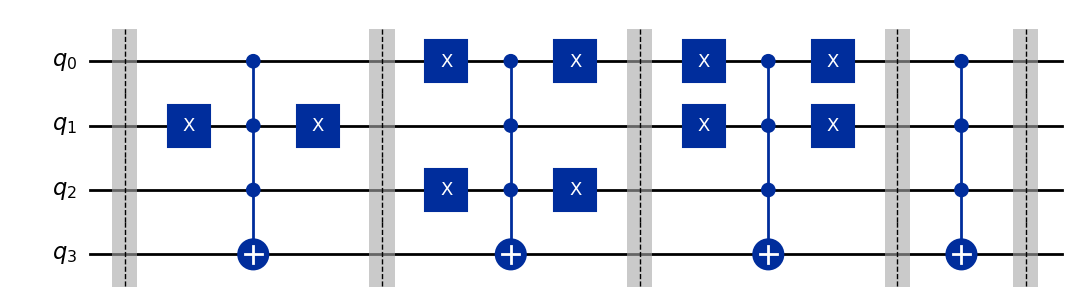

In [ ]:
# Testing
display(query_function(3).draw('mpl'))

### Here comes the circuit

In [20]:
def deutsch_jozsa_algorithm(function:QuantumCircuit):

    n = function.num_qubits - 1    # number of input qubits
    qc = QuantumCircuit(n+1, n)    # additional qubit for output/ancilla
    qc.x(n)                        # set nth qubit to |1>
    qc.h(range(n+1))               # apply Hadamard to all qubits
    qc.compose(function, inplace=True) # apply the oracle
    qc.h(range(n))                 # apply Hadamard to first n qubits
    qc.measure(range(n), range(n)) # measure first n qubits
    return qc

In [21]:
# Wraps everythin in a function
def run_deutsch_jozsa(function: QuantumCircuit):

    qc = deutsch_jozsa_algorithm(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "Balanced"
    return "Constant"

## Results

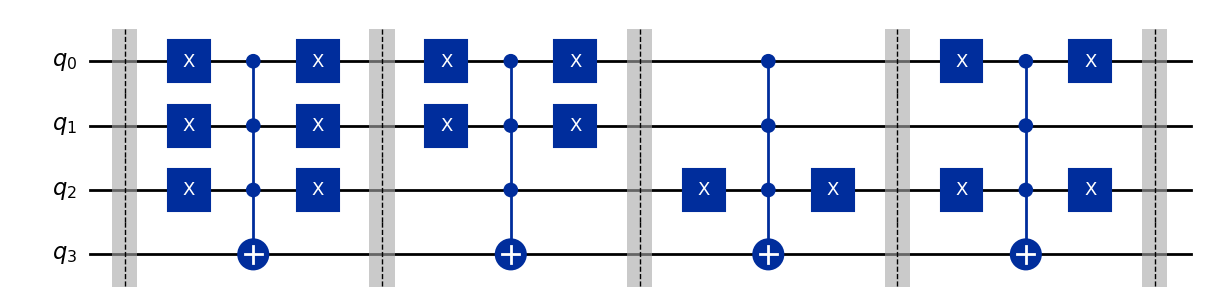

'Balanced'

In [22]:
f = query_function(3)
display(f.draw('mpl'))
display(run_deutsch_jozsa(f))